In [1]:
# Summary of Titanic Survival Prediction Analysis:
# Data Loading & Exploration: Loaded and explored train/test data, checked for missing values, data types, duplicates, and performed initial visualizations.

# Feature Engineering & Preprocessing:
# - Created 'Family_Size' and 'Alone'.
# - Handled missing 'Age' and 'Embarked'.
# - Processed 'Name' for 'Title'.
# - Imputed missing 'Fare'.
# - Dropped irrelevant columns.
# - Applied one-hot encoding for categorical features.

# Both 'Family_Size' and 'Alone' are included as features as they capture different aspects of family structure relevant to survival:
# - 'Family_Size' provides granular information on the number of family members which allows the model to potentially identify survival patterns associated with different family sizes (e.g., small families vs. large families).
# - 'Alone' is a binary feature specifically highlighting the survival pattern of individuals traveling without family.
# This allows the model to distinguish between the impact of different family sizes and the unique case of being alone.

# Model Training & Evaluation: Trained and evaluated Logistic Regression, Random Forest, Gradient Boosting, SVC, KNeighbors, and Decision Tree models using hyperparameter tuning (GridSearchCV) and cross-validation.
# Important Evaluation Metrics to Consider:
# - Precision: Crucial for minimizing false positives (predicting survival for those who didn't).
#   In this scenario, incorrectly predicting someone survived when they didn't could have serious consequences, making precision a very important metric.
# - Recall: Important for minimizing false negatives (missing actual survivors).
# - F1-Score: Balances Precision and Recall.
# - Accuracy: Overall measure, but less informative than Recall/Precision/F1 for this problem.

# Best Performing Models:
# Based on F1-Score, Recall,and especially Precision, Random Forest (Tuned) and SVC (Tuned) were the top performers.
# - Random Forest (Tuned): F1=0.775, Recall=0.725, Precision=0.833 (Validation Set); Mean CV Accuracy=0.826.
# - SVC (Tuned): F1=0.752, Recall=0.725,Precision=0.781 (Validation Set); Mean CV Accuracy=0.827.

# Best Parameters:
# - Random Forest: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}
# - SVC: {'C': 100, 'gamma': 'scale', 'kernel': 'linear'}
# Both Random Forest and SVC are strong candidates for final prediction due to their balanced performance in identifying survivors, with Random Forest having a slightly higher precision on the validation set.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train = pd.read_csv('/content/drive/MyDrive/dataset/titanic/train.csv')
test  =pd.read_csv('/content/drive/MyDrive/dataset/titanic/test.csv')

In [ ]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
test.head(5)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


#Data Analysis

In [ ]:
train.isnull().sum()


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
test.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,327


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
train.duplicated().sum()

np.int64(0)

In [ ]:
test.duplicated().sum()

np.int64(0)

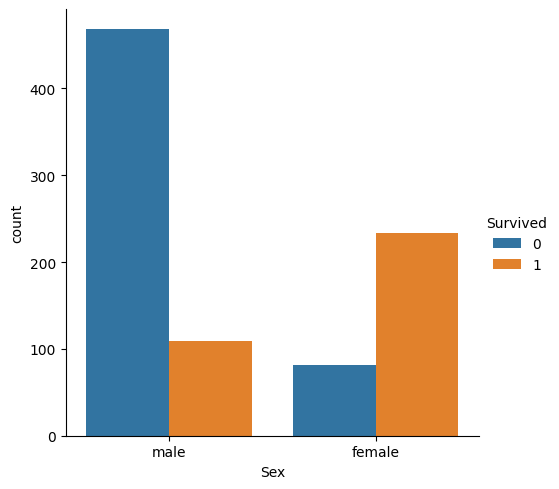

In [ ]:
sns.catplot(x ="Sex", hue ="Survived",
kind ="count", data = train)


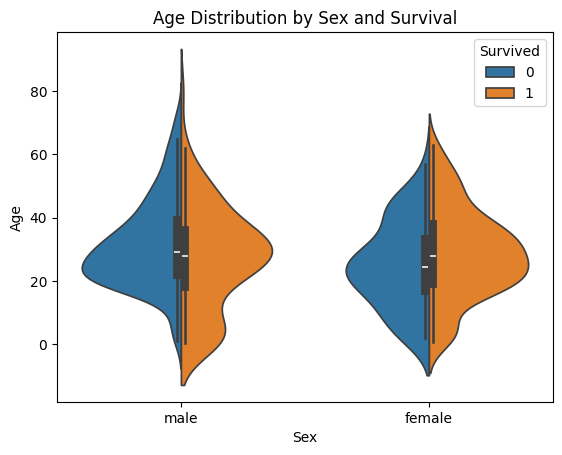

In [ ]:
sns.violinplot(x='Sex', y='Age', hue='Survived', data=train, split=True)
plt.title('Age Distribution by Sex and Survival')
plt.show()

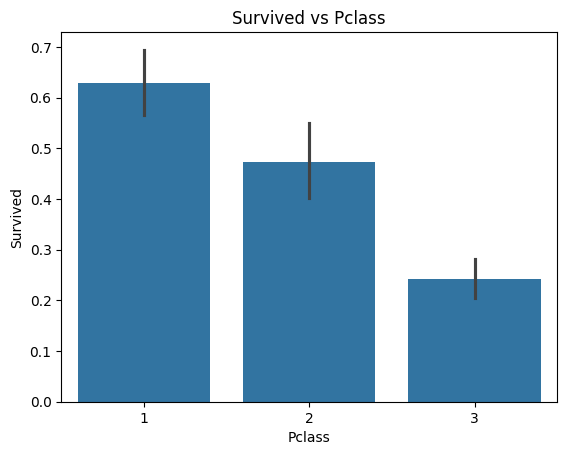

In [ ]:
sns.barplot(x='Pclass', y='Survived', data=train)
plt.title('Survived vs Pclass')
plt.show()

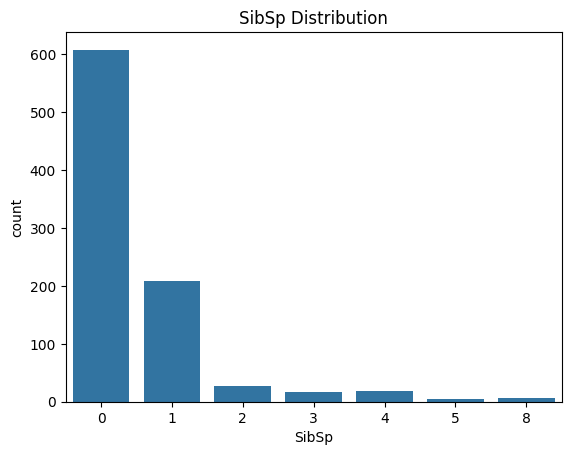

In [ ]:
sns.countplot(x='SibSp', data=train)
plt.title('SibSp Distribution')
plt.show()

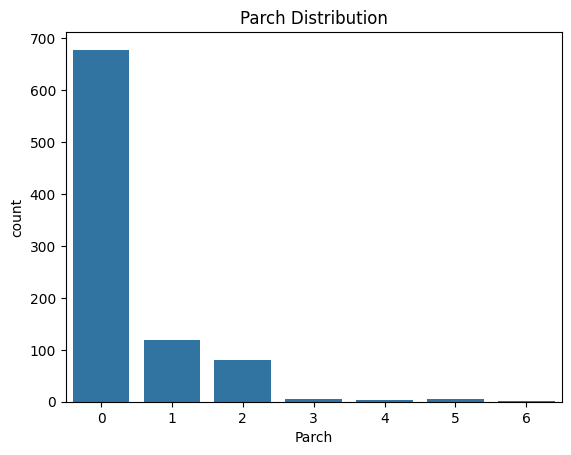

In [ ]:
sns.countplot(x='Parch', data=train)
plt.title('Parch Distribution')
plt.show()

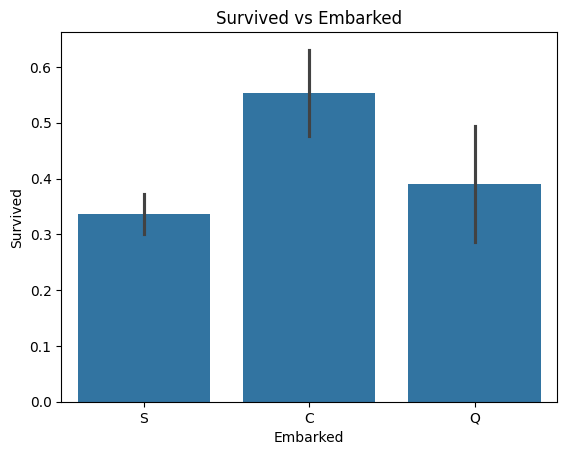

In [ ]:
sns.barplot(x='Embarked', y='Survived', data=train)
plt.title('Survived vs Embarked')
plt.show()

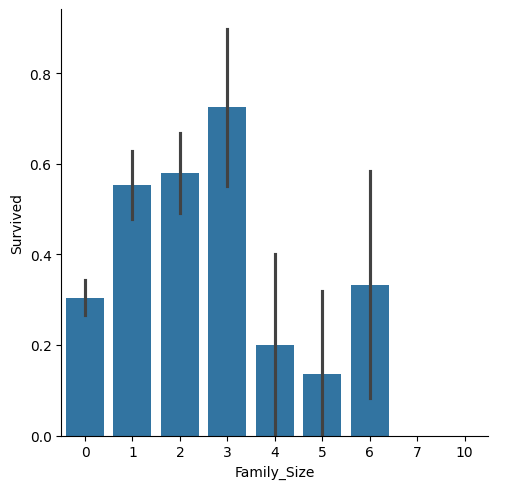

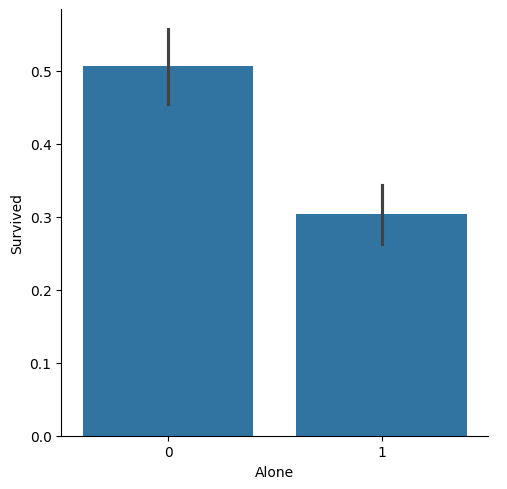

In [ ]:
# Adding a column Family_Size
train['Family_Size'] = 0
train['Family_Size'] = train['Parch']+train['SibSp']

# Adding a column Alone
train['Alone'] = 0
train.loc[train.Family_Size == 0, 'Alone'] = 1

# Factorplot for Family_Size
sns.catplot(x ='Family_Size', y ='Survived', data = train, kind='bar')

# Factorplot for Alone
sns.catplot(x ='Alone', y ='Survived', data = train, kind='bar')

In [ ]:
median_age_train = train.groupby(['Pclass', 'Sex'])['Age'].median()
median_age_test = test.groupby(['Pclass', 'Sex'])['Age'].median()
display(median_age_train)
display(median_age_test)

Pclass  Sex   
1       female    35.0
        male      40.0
2       female    28.0
        male      30.0
3       female    21.5
        male      25.0
Name: Age, dtype: float64

Pclass  Sex   
1       female    41.0
        male      42.0
2       female    24.0
        male      28.0
3       female    22.0
        male      24.0
Name: Age, dtype: float64

In [ ]:
train['Age'] = train.apply(lambda row: median_age_train[(row['Pclass'], row['Sex'])] if pd.isnull(row['Age']) else row['Age'], axis=1)
test['Age'] = test.apply(lambda row: median_age_test[(row['Pclass'], row['Sex'])] if pd.isnull(row['Age']) else row['Age'], axis=1)

In [ ]:
train_age_null_count = train['Age'].isnull().sum()
test_age_null_count = test['Age'].isnull().sum()

print(f"Missing values in train['Age']: {train_age_null_count}")
print(f"Missing values in test['Age']: {test_age_null_count}")

Missing values in train['Age']: 0
Missing values in test['Age']: 0


In [ ]:
mode_embarked = train['Embarked'].mode()[0]
train['Embarked'] = train['Embarked'].fillna(mode_embarked)
test['Embarked'] = test['Embarked'].fillna(test['Embarked'].mode()[0])

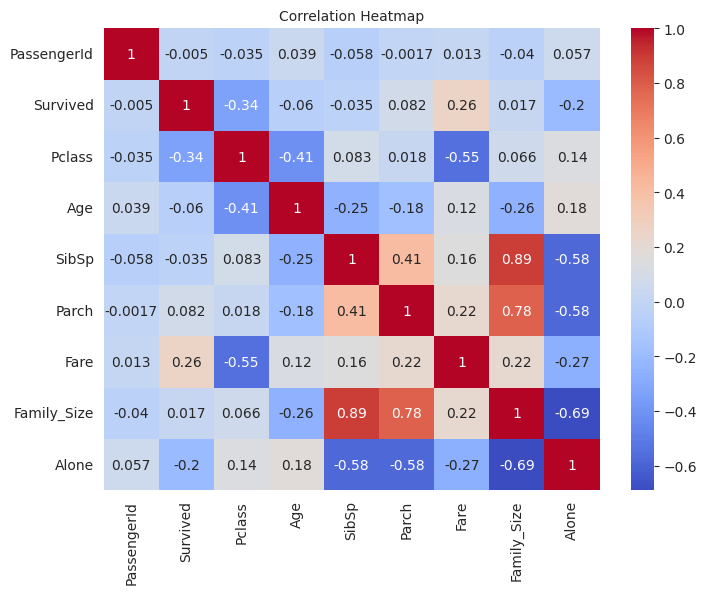

In [ ]:
sns.set_style('white')

train_numeric = train.drop('Name', axis=1)

corr = train_numeric.corr(numeric_only=True)

plt.figure(figsize=(8, 6))
sns.heatmap(corr, cmap='coolwarm', annot=True, annot_kws={'size':10})
plt.title('Correlation Heatmap', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [ ]:
# Extract titles from the Name column and create a new feature
train['Title'] = train['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
test['Title'] = test['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Replace rare titles with a common one
train['Title'] = train['Title'].replace(['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
test['Title'] = test['Title'].replace(['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
test['Title'] = test['Title'].replace('Ms', 'Miss')
test['Title'] = test['Title'].replace('Mlle', 'Miss')
test['Title'] = test['Title'].replace('Mme', 'Mrs')

# Encode the Title feature
train = pd.get_dummies(train, columns=['Title'], prefix='Title')
test = pd.get_dummies(test, columns=['Title'], prefix='Title')

# Add Family_Size and Alone columns to test set if they don't exist
if 'Family_Size' not in test.columns:
    test['Family_Size'] = 0
    test['Family_Size'] = test['Parch'] + test['SibSp']
if 'Alone' not in test.columns:
    test['Alone'] = 0
    test.loc[test.Family_Size == 0, 'Alone'] = 1

In [ ]:
train.drop(['Name','Cabin','Ticket','PassengerId'],axis=1,inplace=True)
test.drop(['Name','Cabin','Ticket','PassengerId'],axis=1,inplace=True)

train['Sex'] = train['Sex'].astype('object')
test['Sex'] = test['Sex'].astype('object')
train['Embarked'] = train['Embarked'].astype('object')
test['Embarked'] = test['Embarked'].astype('object')


# Encode categorical features 'Sex' and 'Embarked'
train = pd.get_dummies(train, columns=['Sex', 'Embarked'], drop_first=True)
test = pd.get_dummies(test, columns=['Sex', 'Embarked'], drop_first=True)

# Add Family_Size and Alone columns to test set
test['Family_Size'] = 0
test['Family_Size'] = test['Parch'] + test['SibSp']
test['Alone'] = 0
test.loc[test.Family_Size == 0, 'Alone'] = 1


# Define features (X) and target (y) for the training data
X_train = train.drop(['Survived'], axis=1)
y_train = train['Survived']

# Define features (X) for the test data.
X_test = test.copy()

# Impute missing Fare value in the test set based on the median fare for each Pclass in the training data
median_fare_by_pclass = X_train.groupby('Pclass')['Fare'].median()
X_test['Fare'] = X_test.apply(lambda row: median_fare_by_pclass[row['Pclass']] if pd.isnull(row['Fare']) else row['Fare'], axis=1)


# Align columns - very important for consistent feature sets
# This will add missing columns to X_test and fill with 0, and drop extra columns from X_test
missing_cols = set(X_train.columns) - set(X_test.columns)
for c in missing_cols:
    X_test[c] = 0
# Ensure the order of columns is the same
X_test = X_test[X_train.columns]

###Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Split the training data into training and validation sets
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size=0.2, random_state=0) # Using 20% of the data for validation

# Initialize and train the Logistic Regression model on the training split
model = LogisticRegression(solver='liblinear', random_state=0)
model.fit(X_train_split, y_train_split)

print("Model trained successfully on the training split.")

Model trained successfully on the training split.


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Make predictions on the validation set
y_pred = model.predict(X_val_split)

# Evaluate the model on the validation set
accuracy = accuracy_score(y_val_split, y_pred)
precision = precision_score(y_val_split, y_pred)
recall = recall_score(y_val_split, y_pred)
f1 = f1_score(y_val_split, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.8100558659217877
Precision: 0.7536231884057971
Recall: 0.7536231884057971
F1 Score: 0.7536231884057971


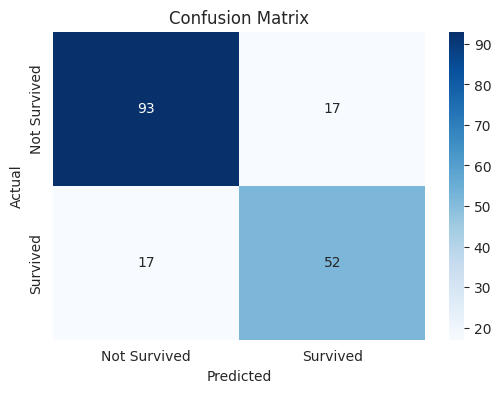

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the confusion matrix
cm = confusion_matrix(y_val_split, y_pred)

# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# The predictions (y_pred) are now available. The next step is to create a submission file.

###Random Forest


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the RandomForestClassifier model
rf_model = RandomForestClassifier(random_state=0)
rf_model.fit(X_train_split, y_train_split)

print("Random Forest model trained successfully on the training split.")

Random Forest model trained successfully on the training split.


In [ ]:
y_pred_rf = rf_model.predict(X_val_split)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate and print evaluation metrics
accuracy_rf = accuracy_score(y_val_split, y_pred_rf)
precision_rf = precision_score(y_val_split, y_pred_rf)
recall_rf = recall_score(y_val_split, y_pred_rf)
f1_rf = f1_score(y_val_split, y_pred_rf)

print(f"Random Forest Accuracy: {accuracy_rf}")
print(f"Random Forest Precision: {precision_rf}")
print(f"Random Forest Recall: {recall_rf}")
print(f"Random Forest F1 Score: {f1_rf}")

Random Forest Accuracy: 0.8379888268156425
Random Forest Precision: 0.8333333333333334
Random Forest Recall: 0.7246376811594203
Random Forest F1 Score: 0.7751937984496124


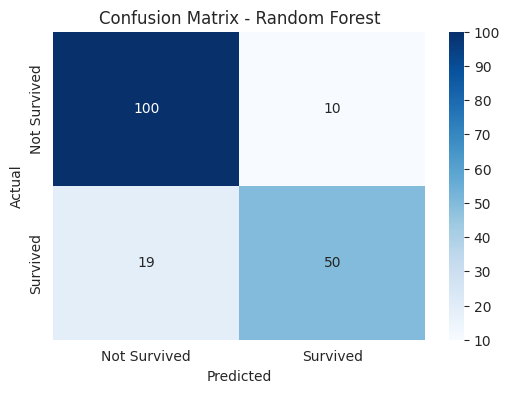

In [ ]:
cm_rf = confusion_matrix(y_val_split, y_pred_rf)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()

##HyperParameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [ ]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs']
}

In [ ]:
model = LogisticRegression(random_state=0)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)

In [ ]:
grid_search.fit(X_train_split, y_train_split)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=0),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'solver': ['liblinear', 'lbfgs']})

In [ ]:
best_params = grid_search.best_params_
tuned_model = LogisticRegression(**best_params, random_state=0)
tuned_model.fit(X_train_split, y_train_split)
print("Tuned Logistic Regression model trained successfully on the training split.")

Tuned Logistic Regression model trained successfully on the training split.


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Make predictions on the validation set
y_pred_tuned = tuned_model.predict(X_val_split)

# Calculate and print evaluation metrics
accuracy_tuned = accuracy_score(y_val_split, y_pred_tuned)
precision_tuned = precision_score(y_val_split, y_pred_tuned)
recall_tuned = recall_score(y_val_split, y_pred_tuned)
f1_tuned = f1_score(y_val_split, y_pred_tuned)

print(f"Tuned Logistic Regression Accuracy: {accuracy_tuned}")
print(f"Tuned Logistic Regression Precision: {precision_tuned}")
print(f"Tuned Logistic Regression Recall: {recall_tuned}")
print(f"Tuned Logistic Regression F1 Score: {f1_tuned}")

Tuned Logistic Regression Accuracy: 0.8156424581005587
Tuned Logistic Regression Precision: 0.75
Tuned Logistic Regression Recall: 0.782608695652174
Tuned Logistic Regression F1 Score: 0.7659574468085106


#Tune and evaluate multiple classification models

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Initialize models
rf_model = RandomForestClassifier(random_state=0)
gb_model = GradientBoostingClassifier(random_state=0)
svc_model = SVC(random_state=0)
knn_model = KNeighborsClassifier()
dt_model = DecisionTreeClassifier(random_state=0)

# Define parameter grids for each model
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

param_grid_svc = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto'],
    'kernel': ['linear', 'rbf']
}

param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance']
}

param_grid_dt = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

## Perform gridsearchcv with cross-validation



In [ ]:
models = {
    'RandomForest': (rf_model, param_grid_rf),
    'GradientBoosting': (gb_model, param_grid_gb),
    'SVC': (svc_model, param_grid_svc),
    'KNeighbors': (knn_model, param_grid_knn),
    'DecisionTree': (dt_model, param_grid_dt)
}

best_estimators = {}

for model_name, (model, param_grid) in models.items():
    print(f"Running GridSearchCV for {model_name}...")
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
    grid_search.fit(X_train_split, y_train_split)
    best_estimators[model_name] = grid_search.best_estimator_
    print(f"GridSearchCV completed for {model_name}. Best parameters: {grid_search.best_params_}")

Running GridSearchCV for RandomForest...
GridSearchCV completed for RandomForest. Best parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}
Running GridSearchCV for GradientBoosting...
GridSearchCV completed for GradientBoosting. Best parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300}
Running GridSearchCV for SVC...
GridSearchCV completed for SVC. Best parameters: {'C': 100, 'gamma': 'scale', 'kernel': 'linear'}
Running GridSearchCV for KNeighbors...
GridSearchCV completed for KNeighbors. Best parameters: {'n_neighbors': 5, 'weights': 'distance'}
Running GridSearchCV for DecisionTree...
GridSearchCV completed for DecisionTree. Best parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2}


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

for model_name, tuned_model in best_estimators.items():
    print(f"Evaluating {model_name}...")
    y_pred_tuned = tuned_model.predict(X_val_split)

    accuracy_tuned = accuracy_score(y_val_split, y_pred_tuned)
    precision_tuned = precision_score(y_val_split, y_pred_tuned)
    recall_tuned = recall_score(y_val_split, y_pred_tuned)
    f1_tuned = f1_score(y_val_split, y_pred_tuned)

    print(f"{model_name} - Accuracy: {accuracy_tuned}")
    print(f"{model_name} - Precision: {precision_tuned}")
    print(f"{model_name} - Recall: {recall_tuned}")
    print(f"{model_name} - F1 Score: {f1_tuned}")
    print("-" * 30)

Evaluating RandomForest...
RandomForest - Accuracy: 0.8435754189944135
RandomForest - Precision: 0.8253968253968254
RandomForest - Recall: 0.7536231884057971
RandomForest - F1 Score: 0.7878787878787878
------------------------------
Evaluating GradientBoosting...
GradientBoosting - Accuracy: 0.8156424581005587
GradientBoosting - Precision: 0.8
GradientBoosting - Recall: 0.6956521739130435
GradientBoosting - F1 Score: 0.7441860465116279
------------------------------
Evaluating SVC...
SVC - Accuracy: 0.8156424581005587
SVC - Precision: 0.78125
SVC - Recall: 0.7246376811594203
SVC - F1 Score: 0.7518796992481203
------------------------------
Evaluating KNeighbors...
KNeighbors - Accuracy: 0.7318435754189944
KNeighbors - Precision: 0.7058823529411765
KNeighbors - Recall: 0.5217391304347826
KNeighbors - F1 Score: 0.6
------------------------------
Evaluating DecisionTree...
DecisionTree - Accuracy: 0.8212290502793296
DecisionTree - Precision: 0.8490566037735849
DecisionTree - Recall: 0.652

In [ ]:
top_3_models = ['RandomForest', 'SVC', 'DecisionTree']
print("Top 3 models based on F1 Score and Precision:")
print(top_3_models)

Top 3 models based on F1 Score and Precision:
['RandomForest', 'SVC', 'DecisionTree']


## Perform cross-validation



In [ ]:
from sklearn.model_selection import cross_val_score

cross_val_scores = {}

for model_name in top_3_models:
    print(f"Performing cross-validation for {model_name}...")
    model = best_estimators[model_name]
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    cross_val_scores[model_name] = scores
    print(f"{model_name} - Cross-validation Accuracy Scores: {scores}")
    print(f"{model_name} - Mean Cross-validation Accuracy: {scores.mean()}")
    print("-" * 30)


Performing cross-validation for RandomForest...
RandomForest - Cross-validation Accuracy Scores: [0.82122905 0.80337079 0.85393258 0.79775281 0.85393258]
RandomForest - Mean Cross-validation Accuracy: 0.8260435628648546
------------------------------
Performing cross-validation for SVC...
SVC - Cross-validation Accuracy Scores: [0.84916201 0.8258427  0.80337079 0.79775281 0.85955056]
SVC - Mean Cross-validation Accuracy: 0.8271357730211537
------------------------------
Performing cross-validation for DecisionTree...
DecisionTree - Cross-validation Accuracy Scores: [0.75977654 0.7247191  0.83707865 0.81460674 0.80898876]
DecisionTree - Mean Cross-validation Accuracy: 0.789033958947963
------------------------------


In [ ]:
for model_name, scores in cross_val_scores.items():
    mean_accuracy = scores.mean()
    std_accuracy = scores.std()
    print(f"{model_name}: Mean Accuracy = {mean_accuracy:.4f}, Standard Deviation = {std_accuracy:.4f}")

RandomForest: Mean Accuracy = 0.8260, Standard Deviation = 0.0241
SVC: Mean Accuracy = 0.8271, Standard Deviation = 0.0244
DecisionTree: Mean Accuracy = 0.7890, Standard Deviation = 0.0409


In [ ]:
# Create a dictionary to store the metrics for each model
metrics_data = {
    'Model': ['Logistic Regression (Tuned)', 'Random Forest (Tuned)', 'Gradient Boosting (Tuned)', 'SVC (Tuned)', 'KNeighbors (Tuned)', 'Decision Tree (Tuned)'],
    'Accuracy': [accuracy_tuned, accuracy_rf, best_estimators['GradientBoosting'].score(X_val_split, y_val_split), best_estimators['SVC'].score(X_val_split, y_val_split), best_estimators['KNeighbors'].score(X_val_split, y_val_split), best_estimators['DecisionTree'].score(X_val_split, y_val_split)],
    'Precision': [precision_tuned, precision_rf, precision_score(y_val_split, best_estimators['GradientBoosting'].predict(X_val_split)), precision_score(y_val_split, best_estimators['SVC'].predict(X_val_split)), precision_score(y_val_split, best_estimators['KNeighbors'].predict(X_val_split)), precision_score(y_val_split, best_estimators['DecisionTree'].predict(X_val_split))],
    'Recall': [recall_tuned, recall_rf, recall_score(y_val_split, best_estimators['GradientBoosting'].predict(X_val_split)), recall_score(y_val_split, best_estimators['SVC'].predict(X_val_split)), recall_score(y_val_split, best_estimators['KNeighbors'].predict(X_val_split)), recall_score(y_val_split, best_estimators['DecisionTree'].predict(X_val_split))],
    'F1 Score': [f1_tuned, f1_rf, f1_score(y_val_split, best_estimators['GradientBoosting'].predict(X_val_split)), f1_score(y_val_split, best_estimators['SVC'].predict(X_val_split)), f1_score(y_val_split, best_estimators['KNeighbors'].predict(X_val_split)), f1_score(y_val_split, best_estimators['DecisionTree'].predict(X_val_split))]
}

# Create a DataFrame from the dictionary
metrics_df = pd.DataFrame(metrics_data)

# Display the DataFrame
display(metrics_df)

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression (Tuned),0.821229,0.849057,0.652174,0.737705
1,Random Forest (Tuned),0.837989,0.833333,0.724638,0.775194
2,Gradient Boosting (Tuned),0.815642,0.800000,0.695652,0.744186
3,SVC (Tuned),0.815642,0.781250,0.724638,0.751880
4,KNeighbors (Tuned),0.731844,0.705882,0.521739,0.600000
5,Decision Tree (Tuned),0.821229,0.849057,0.652174,0.737705


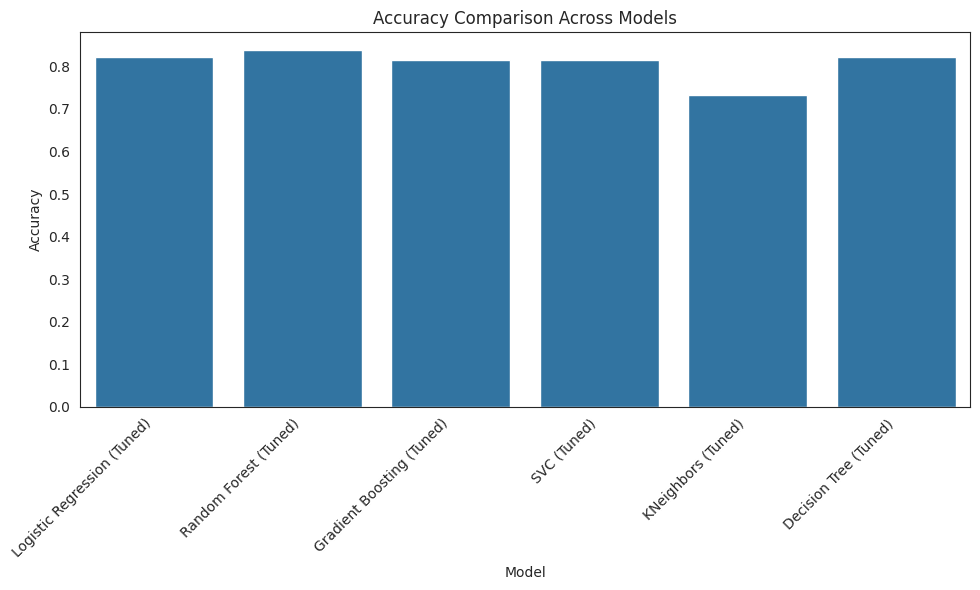

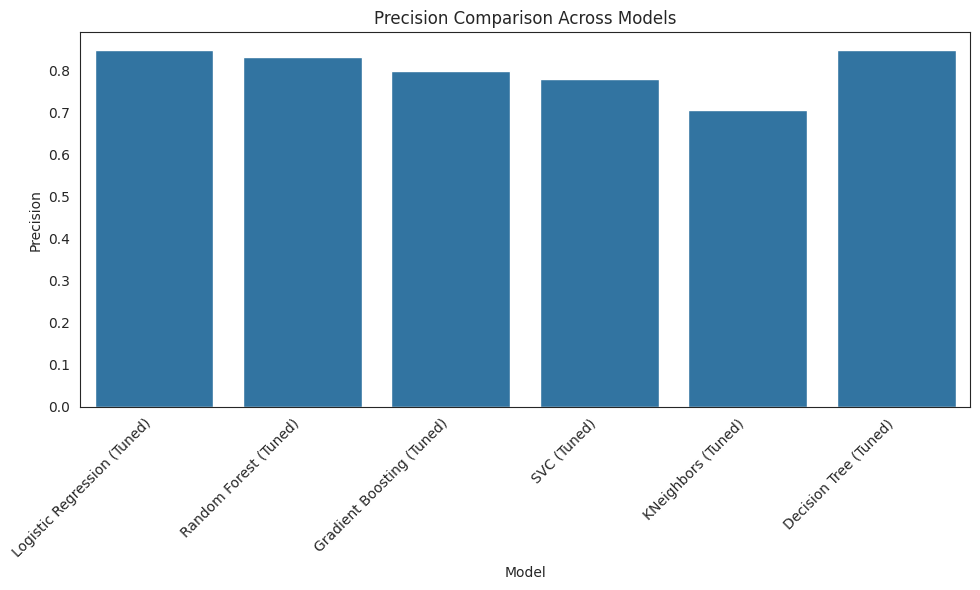

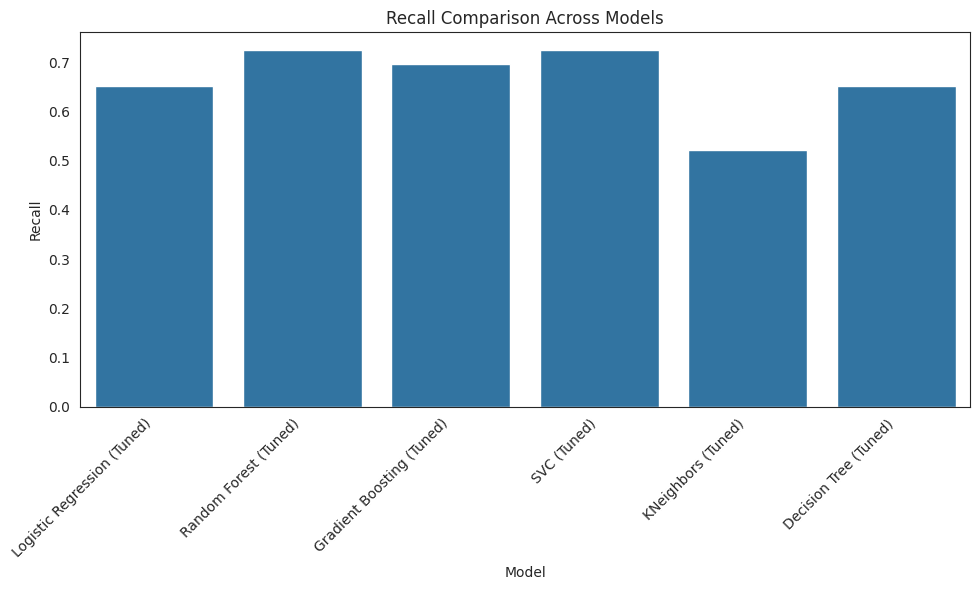

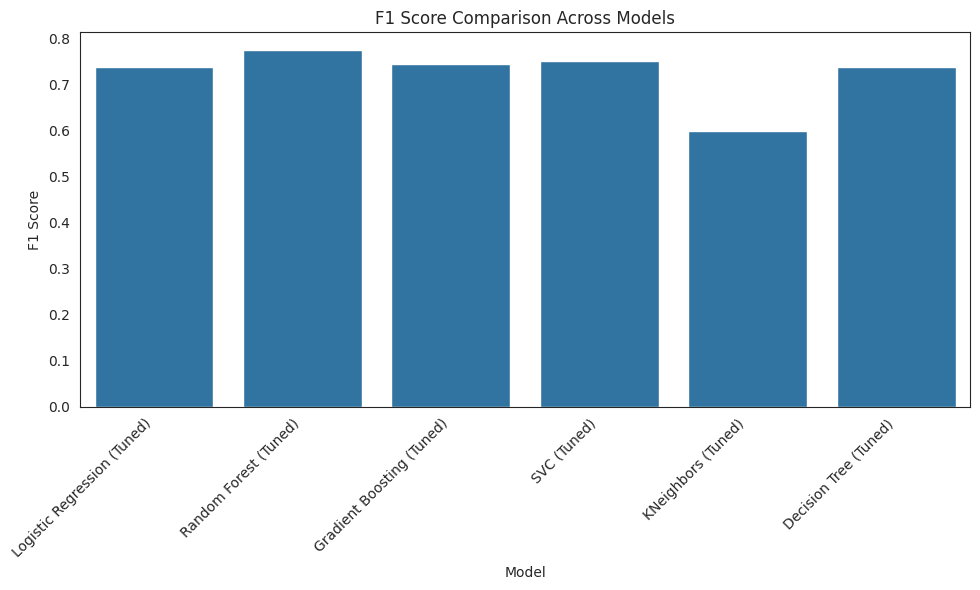

In [ ]:
# Visualize the metrics using bar plots
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

for metric in metrics:
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Model', y=metric, data=metrics_df)
    plt.title(f'{metric} Comparison Across Models')
    plt.ylabel(metric)
    plt.xlabel('Model')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

In [ ]:
# Make predictions on the test data using the tuned Random Forest model
y_pred_test_rf = best_estimators['RandomForest'].predict(X_test)

In [ ]:
# Load the original test data to get the PassengerId
test_original = pd.read_csv('/content/drive/MyDrive/dataset/titanic/test.csv')

# Create the submission DataFrame
submission = pd.DataFrame({
    "PassengerId": test_original["PassengerId"],
    "Survived": y_pred_test_rf
})

display(submission.head())

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [ ]:
# Save the submission file
submission.to_csv('submission.csv', index=False)

print("Submission file created successfully!")

Submission file created successfully!
